In [1]:
!pip install np_utils



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

#from keras.utils import np_utils
from keras import utils
from tensorflow.python.keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D



from tensorflow.keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
#from tensorflow.keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Dense, BatchNormalization

import os
print(os.listdir("C:/Users/tejpa/OneDrive/Desktop/salar/CK+48"))


# Any results you write to the current directory are saved as output

#from keras.wrappers.scikit_learn import KerasClassifier
#from scikeras.wrappers import KerasRegressor

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


C:\Users\tejpa\AppData\Local\Temp\ipykernel_9080\950709295.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']


# Extracting images from directory

In [3]:
data_path = "C:/Users/tejpa/OneDrive/Desktop/salar/CK+48"
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-contempt

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(981, 48, 48, 3)

# Putting label in data

In [4]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:134]=0 #135
labels[135:188]=1 #54
labels[189:365]=2 #177
labels[366:440]=3 #75
labels[441:647]=4 #207
labels[648:731]=5 #84
labels[732:980]=6 #249

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

# Splitting train test

In [5]:
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

# Creating Model

In [6]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')
    
    return model


# Model Summary

In [7]:
model_custom = create_model()
model_custom.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2416      
                                                                 
 activation (Activation)     (None, 24, 24, 16)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)      

# Model Visualization

In [8]:
from keras.utils import plot_model
plot_model(model_custom, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# Conduct k-Fold Cross-Validation

In [9]:
from sklearn.model_selection import KFold

In [10]:
kf = KFold(n_splits=5, shuffle=False)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")


# Training Model

In [12]:
BS = 8
EPOCHS = 200

In [13]:
result = []
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(x):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    file_path = "/kaggle/working/weights_best_"+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = create_model()
    hist = model.fit_generator(aug.flow(X_Train_, Y_Train), epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
    # model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
    model.load_weights(file_path)
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

C:\Users\tejpa\AppData\Local\Temp\ipykernel_9080\396589861.py:18: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(aug.flow(X_Train_, Y_Train), epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)


c:\Users\tejpa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 0s 6ms/step


In [14]:
print(scores_acc,scores_loss)

[0.9340101480484009, 0.9336734414100647, 0.954081654548645, 0.9030612111091614, 0.9387755393981934] [0.1983431875705719, 0.281002402305603, 0.355256050825119, 0.2636910676956177, 0.23685412108898163]


# Taking model with lowest Loss

In [15]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

0


In [16]:
model.load_weights("/kaggle/working/weights_best_"+str(value_index)+".hdf5")

In [17]:
best_model = model

# Evaluating model

In [18]:
score = best_model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

test_image = X_test[0:1]
print (test_image.shape)
y1_pred = np.argmax(best_model.predict(test_image),axis=1)
print(y1_pred)
y1_pred_1 = y1_pred[0]
class_pred = names[y1_pred_1]
print(class_pred)

# print(best_model.predict(test_image))
# print(predictions = np.argmax(model.predict(test_image),axis=1))
# print(best_model.predict_classes(test_image))
# print(y_test[0:1])

# #predict
# y_pred = best_model.predict(X_test)

Test Loss: 0.1014798954129219
Test accuracy: 0.9644669890403748
(1, 48, 48, 3)
1/1 [==============================] - 0s 30ms/step
[0]
anger


# Visualizing Train,Test--->Accuracy,Loss

<Figure size 2000x1000 with 0 Axes>

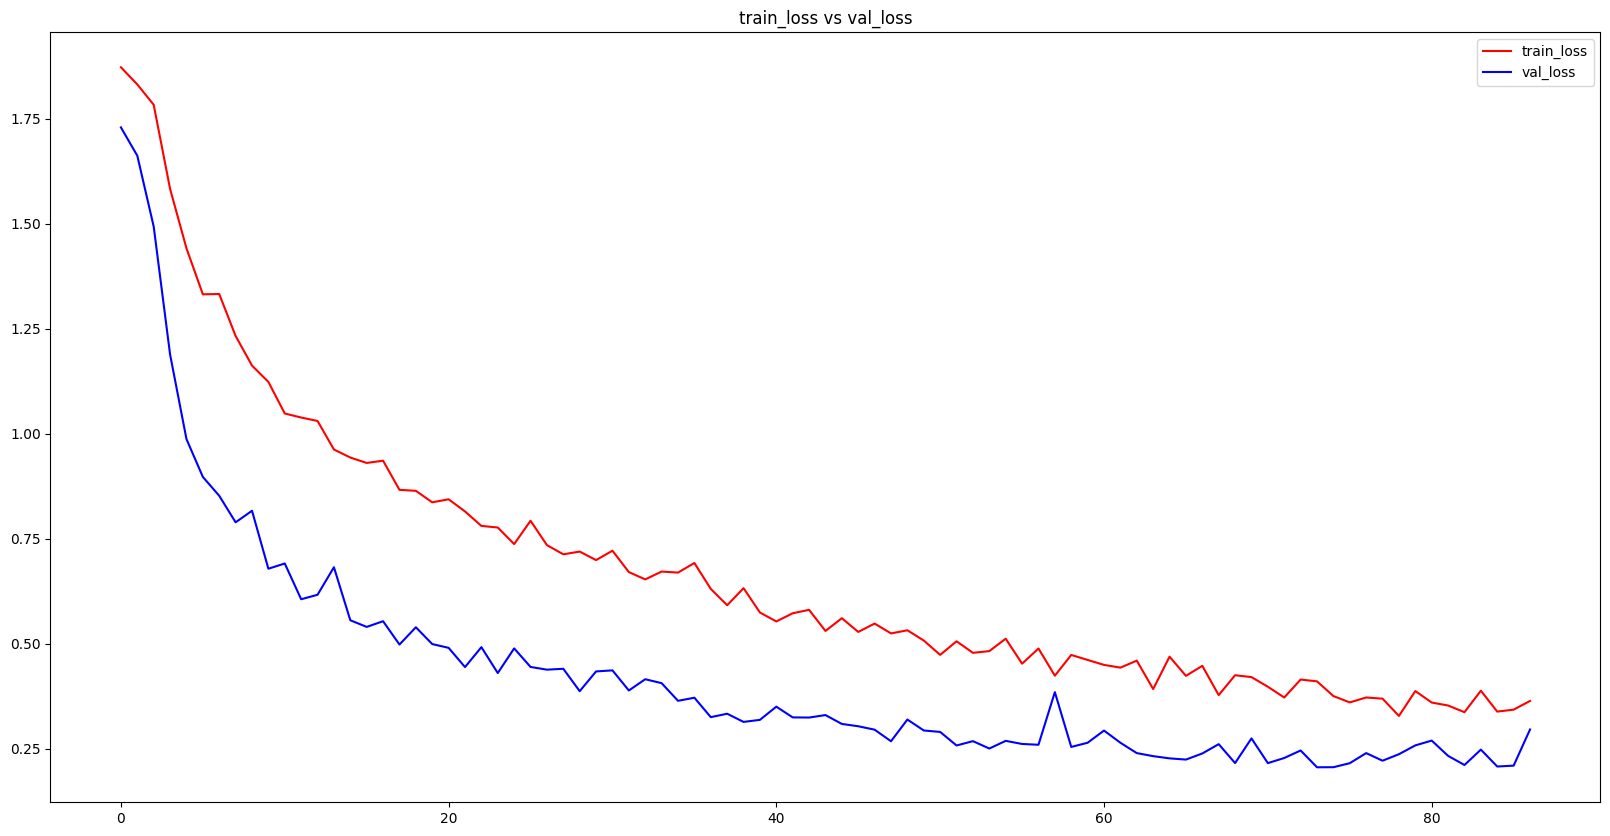

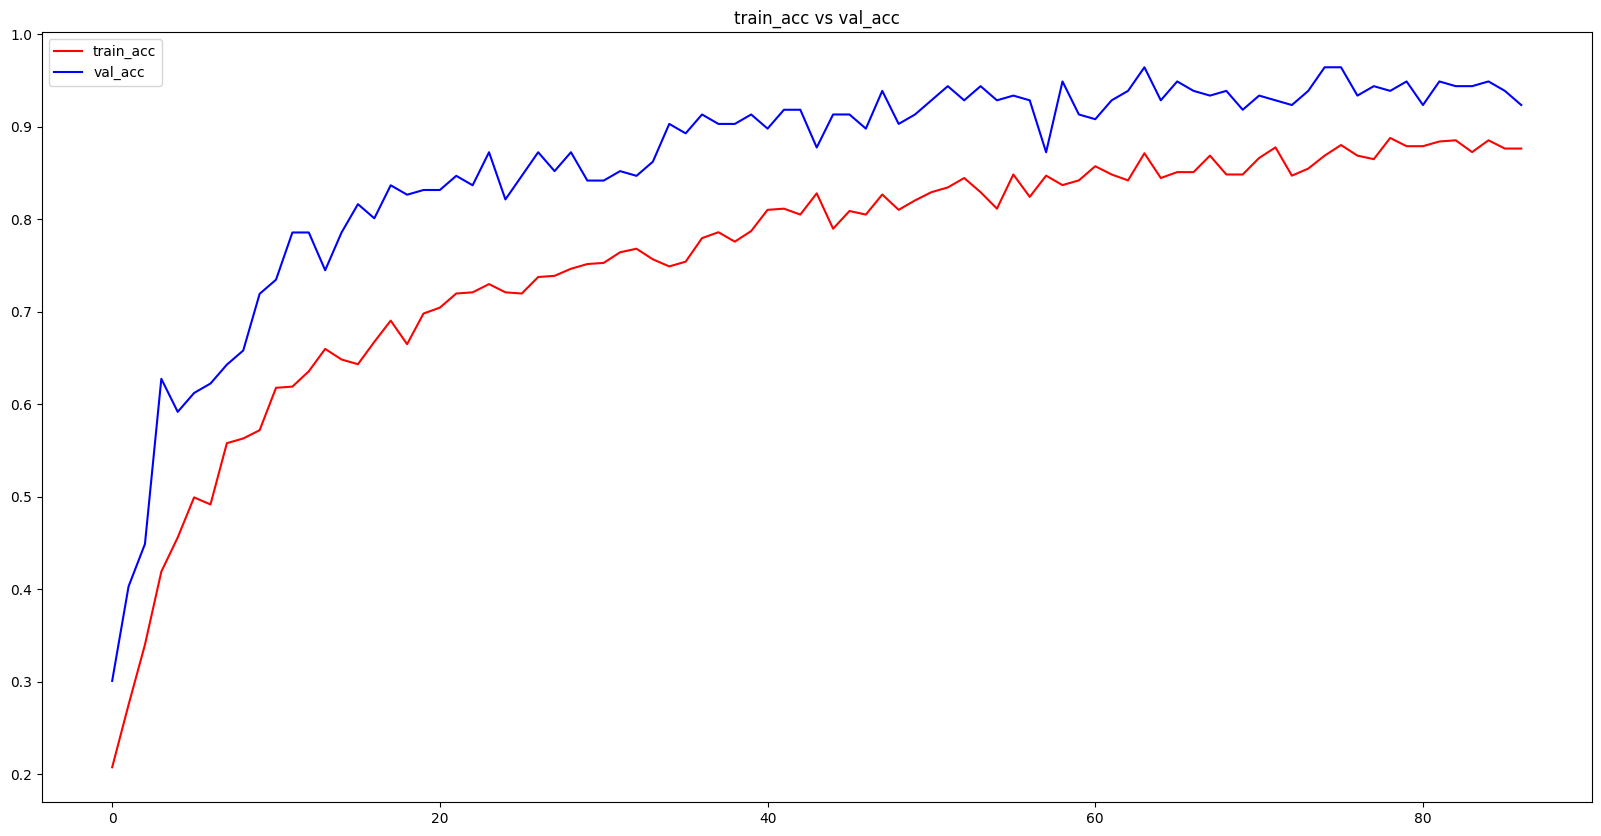

<Figure size 2000x1000 with 0 Axes>

In [20]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [19]:
#Model Save
best_model.save_weights('model_weights.h5')
best_model.save('C:/Users/tejpa/OneDrive/Desktop/salar/face_emotion.h5')
#best_model.save('model_keras.h5')

In [21]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load your trained CNN model
model =best_model

# Load the pre-trained Haar Cascade face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Emotions labels
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Open a connection to the webcam (0 represents the default camera)
cap = cv2.VideoCapture(0)

while True:
    # Read a frame from the webcam
    ret, frame = cap.read()

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY), scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    # Iterate over detected faces
    for (x, y, w, h) in faces:
        # Extract the region of interest (ROI) - the face
        face_roi = rgb_frame[y:y+h, x:x+w]

        # Resize the face image to match the input size of your model
        face_roi_resized = cv2.resize(face_roi, (48, 48))

        # Normalize the pixel values to be in the range [0, 1]
        face_roi_normalized = face_roi_resized / 255.0

        # Reshape the image to match the input shape expected by the model
        face_input = np.reshape(face_roi_normalized, (1, 48, 48, 3))

        # Predict the emotion using your trained CNN model
        emotion_prediction = model.predict(face_input)

        # Get the index of the predicted emotion
        predicted_emotion_index = np.argmax(emotion_prediction)

        # Get the corresponding emotion label
        predicted_emotion = emotions[predicted_emotion_index]

        # Draw a rectangle around the detected face and display the predicted emotion
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, predicted_emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the resulting frame
    cv2.imshow('Real-time Emotion Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the window
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 179ms/step


KeyboardInterrupt: 